<H1>FLIGHT DELAY PREDICTION</H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df.shape

(318017, 21)

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
df.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [ ]:
df1=df.dropna(axis=0, how='any', inplace=False)

In [6]:
df1.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [7]:
df1.duplicated().sum()

np.int64(0)

In [8]:
df1.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:

df1['carrier_name'] = encoder.fit_transform(df1['carrier_name'])
carrier_name = {index : label for index, label in enumerate(encoder.classes_)}
carrier_name

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9068\2668354917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['carrier_name'] = encoder.fit_transform(df1['carrier_name'])


{0: 'ATA Airlines d/b/a ATA',
 1: 'AirTran Airways Corporation',
 2: 'Alaska Airlines Inc.',
 3: 'Allegiant Air',
 4: 'Aloha Airlines Inc.',
 5: 'America West Airlines Inc.',
 6: 'American Airlines Inc.',
 7: 'American Eagle Airlines Inc.',
 8: 'Atlantic Coast Airlines',
 9: 'Atlantic Southeast Airlines',
 10: 'Comair Inc.',
 11: 'Continental Air Lines Inc.',
 12: 'Delta Air Lines Inc.',
 13: 'Endeavor Air Inc.',
 14: 'Envoy Air',
 15: 'ExpressJet Airlines Inc.',
 16: 'ExpressJet Airlines LLC',
 17: 'Frontier Airlines Inc.',
 18: 'Hawaiian Airlines Inc.',
 19: 'Horizon Air',
 20: 'Independence Air',
 21: 'JetBlue Airways',
 22: 'Mesa Airlines Inc.',
 23: 'Northwest Airlines Inc.',
 24: 'PSA Airlines Inc.',
 25: 'Pinnacle Airlines Inc.',
 26: 'Republic Airline',
 27: 'SkyWest Airlines Inc.',
 28: 'Southwest Airlines Co.',
 29: 'Spirit Air Lines',
 30: 'US Airways Inc.',
 31: 'United Air Lines Inc.',
 32: 'Virgin America'}

In [11]:
df1['airport'] = encoder.fit_transform(df1['airport'])
airport = {index : label for index, label in enumerate(encoder.classes_)}
airport

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9068\1804845831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['airport'] = encoder.fit_transform(df1['airport'])


{0: 'ABE',
 1: 'ABI',
 2: 'ABQ',
 3: 'ABR',
 4: 'ABY',
 5: 'ACK',
 6: 'ACT',
 7: 'ACV',
 8: 'ACY',
 9: 'ADK',
 10: 'ADQ',
 11: 'AEX',
 12: 'AGS',
 13: 'AKN',
 14: 'ALB',
 15: 'ALO',
 16: 'ALS',
 17: 'ALW',
 18: 'AMA',
 19: 'ANC',
 20: 'APF',
 21: 'APN',
 22: 'ART',
 23: 'ASE',
 24: 'ATL',
 25: 'ATW',
 26: 'ATY',
 27: 'AUS',
 28: 'AVL',
 29: 'AVP',
 30: 'AZA',
 31: 'AZO',
 32: 'BDL',
 33: 'BET',
 34: 'BFF',
 35: 'BFL',
 36: 'BFM',
 37: 'BGM',
 38: 'BGR',
 39: 'BHM',
 40: 'BIH',
 41: 'BIL',
 42: 'BIS',
 43: 'BJI',
 44: 'BKG',
 45: 'BLI',
 46: 'BLV',
 47: 'BMI',
 48: 'BNA',
 49: 'BOI',
 50: 'BOS',
 51: 'BPT',
 52: 'BQK',
 53: 'BQN',
 54: 'BRD',
 55: 'BRO',
 56: 'BRW',
 57: 'BTM',
 58: 'BTR',
 59: 'BTV',
 60: 'BUF',
 61: 'BUR',
 62: 'BWI',
 63: 'BZN',
 64: 'CAE',
 65: 'CAK',
 66: 'CBM',
 67: 'CDB',
 68: 'CDC',
 69: 'CDV',
 70: 'CEC',
 71: 'CGI',
 72: 'CHA',
 73: 'CHO',
 74: 'CHS',
 75: 'CIC',
 76: 'CID',
 77: 'CIU',
 78: 'CKB',
 79: 'CLD',
 80: 'CLE',
 81: 'CLL',
 82: 'CLT',
 83: 'CMH',
 8

In [12]:
df1['airport_name'] = encoder.fit_transform(df1['airport_name'])
airport_name = {index : label for index, label in enumerate(encoder.classes_)}
airport_name

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9068\1389132035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['airport_name'] = encoder.fit_transform(df1['airport_name'])


{0: 'Aberdeen, SD: Aberdeen Regional',
 1: 'Abilene, TX: Abilene Regional',
 2: 'Adak Island, AK: Adak',
 3: 'Aguadilla, PR: Rafael Hernandez',
 4: 'Akron, OH: Akron-Canton Regional',
 5: 'Alamosa, CO: San Luis Valley Regional/Bergman Field',
 6: 'Albany, GA: Southwest Georgia Regional',
 7: 'Albany, NY: Albany International',
 8: 'Albuquerque, NM: Albuquerque International Sunport',
 9: 'Alexandria, LA: Alexandria International',
 10: 'Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
 11: 'Alpena, MI: Alpena County Regional',
 12: 'Amarillo, TX: Rick Husband Amarillo International',
 13: 'Anchorage, AK: Ted Stevens Anchorage International',
 14: 'Appleton, WI: Appleton International',
 15: 'Arcata/Eureka, CA: California Redwood Coast Humboldt County',
 16: 'Asheville, NC: Asheville Regional',
 17: 'Ashland, WV: Tri-State/Milton J. Ferguson Field',
 18: 'Aspen, CO: Aspen Pitkin County Sardy Field',
 19: 'Atlanta, GA: Hartsfield-Jackson Atlanta International',
 20: 'Atlanti

In [13]:
df1['carrier'] = encoder.fit_transform(df1['carrier'])
carrier = {index : label for index, label in enumerate(encoder.classes_)}
carrier

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9068\2414766676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['carrier'] = encoder.fit_transform(df1['carrier'])


{0: '9E',
 1: 'AA',
 2: 'AQ',
 3: 'AS',
 4: 'B6',
 5: 'CO',
 6: 'DH',
 7: 'DL',
 8: 'EV',
 9: 'F9',
 10: 'FL',
 11: 'G4',
 12: 'HA',
 13: 'HP',
 14: 'MQ',
 15: 'NK',
 16: 'NW',
 17: 'OH',
 18: 'OO',
 19: 'QX',
 20: 'RU',
 21: 'TZ',
 22: 'UA',
 23: 'US',
 24: 'VX',
 25: 'WN',
 26: 'XE',
 27: 'YV',
 28: 'YX'}

In [14]:
x = df1.drop('late_aircraft_delay', axis=1)
y = df1['late_aircraft_delay']

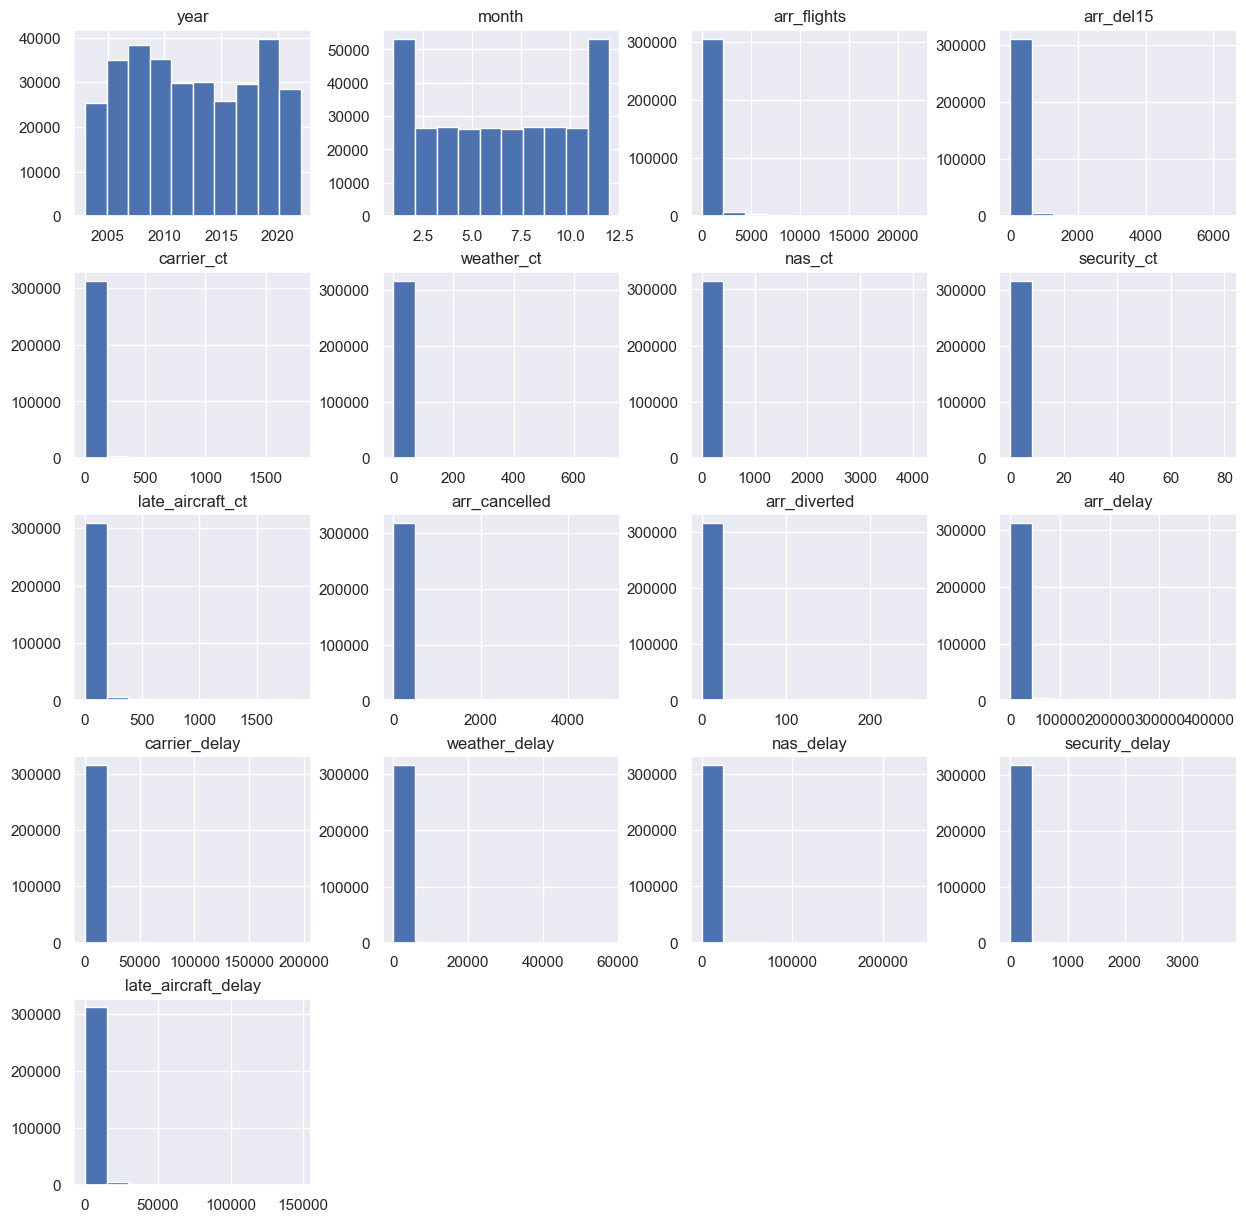

In [15]:
sns.set_theme();
df.hist(figsize=(15,15));

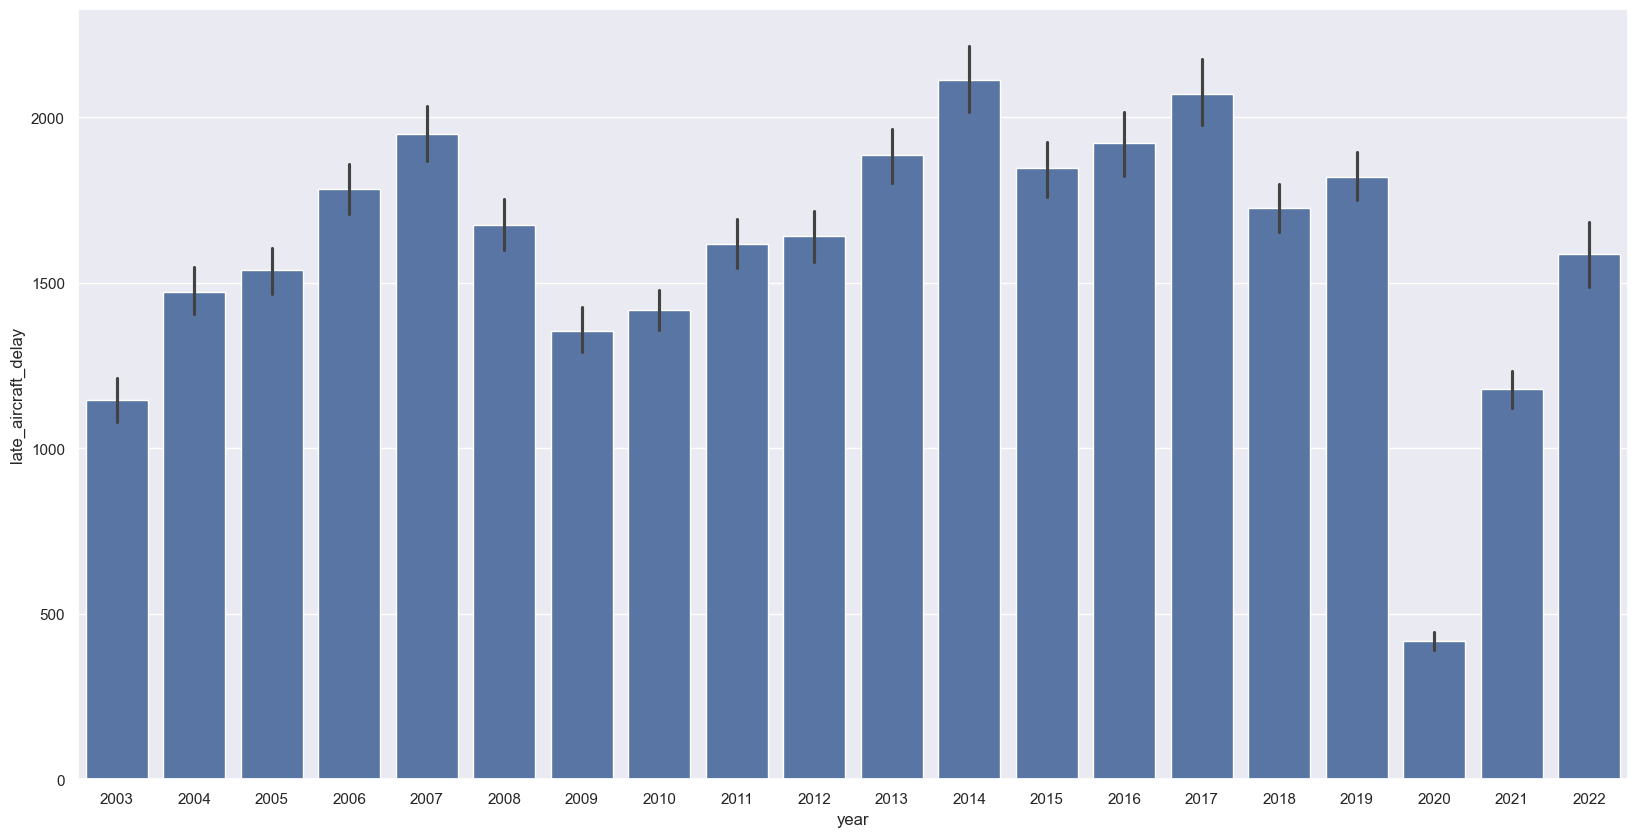

In [16]:
sns.set_theme()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.year, y = df.late_aircraft_delay)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=44)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (317241, 20)
x_test shape is: (20, 20)
y_train shape is: (317241,)
y_test shape is: (20,)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_in_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9735605538335649
Random Forest Regressor Test Score is :  0.9675947267321965
Random Forest Regressor No. of features are :  20
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [ 968.97955376 1453.21434989 3349.04559487  968.97955376  593.6514842
 1444.26723898  968.97955376 2506.1271021   284.37932985 1186.44391197]


In [19]:
from sklearn.metrics import mean_squared_error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1126843.6620416723


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9675947267321965